In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, explained_variance_score

In [6]:
df= pd.read_csv("data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [9]:
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [11]:
list(df.columns)

['type_school',
 'school_accreditation',
 'gender',
 'interest',
 'residence',
 'parent_age',
 'parent_salary',
 'house_area',
 'average_grades',
 'parent_was_in_college',
 'in_college']

In [12]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


<AxesSubplot:xlabel='type_school', ylabel='count'>

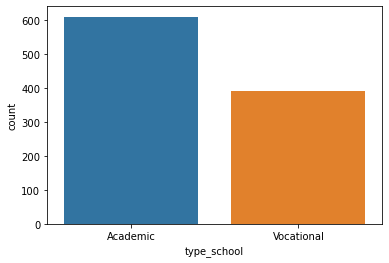

In [13]:
sns.countplot(x = df["type_school"])

<AxesSubplot:xlabel='gender', ylabel='count'>

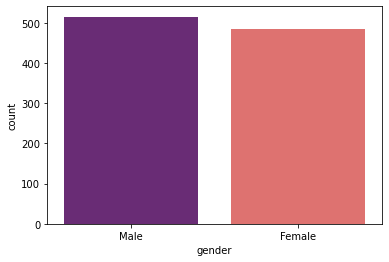

In [15]:
sns.countplot(x = df["gender"], palette= "magma")

<AxesSubplot:xlabel='residence', ylabel='count'>

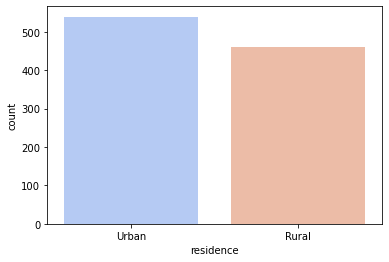

In [17]:
sns.countplot(x = df["residence"], palette= "coolwarm")

<AxesSubplot:xlabel='parent_was_in_college', ylabel='count'>

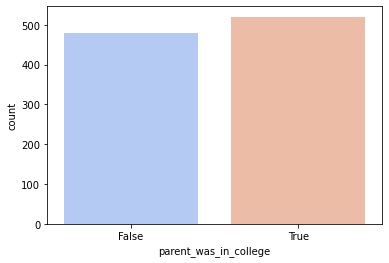

In [18]:
sns.countplot(x = df["parent_was_in_college"], palette= "coolwarm")

<AxesSubplot:xlabel='in_college', ylabel='count'>

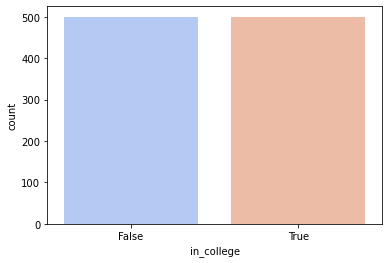

In [19]:
sns.countplot(x = df["in_college"], palette= "coolwarm")

<AxesSubplot:xlabel='school_accreditation', ylabel='count'>

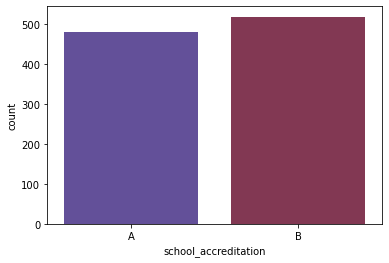

In [21]:
sns.countplot(x = df["school_accreditation"], palette= "twilight")

## Getting dummies

In [23]:
df["type_school"] = pd.get_dummies(df["type_school"], drop_first=True)

In [26]:
df["school_accreditation"] = pd.get_dummies(df["school_accreditation"], drop_first=True)

In [28]:
df["gender"] = pd.get_dummies(df["gender"], drop_first=True)

In [31]:
interest =  pd.get_dummies(df["interest"], drop_first=True)

In [32]:
df = pd.concat([df, interest], axis=1)

In [34]:
df.drop("interest", axis=1, inplace=True)

In [37]:
df["residence"] = pd.get_dummies(df["residence"], drop_first=True)

In [39]:
df["parent_was_in_college"] = pd.get_dummies(df["parent_was_in_college"], drop_first=True)

In [41]:
df["in_college"] = pd.get_dummies(df["in_college"], drop_first=True)

In [43]:
df.corr()

,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,Not Interested,Quiet Interested,Uncertain,Very Interested
type_school,1.000000,-0.020216,0.027206,-0.245634,-0.108553,0.134980,-0.039654,-0.074534,0.146354,-0.034838,0.163540,0.012979,0.153746,-0.064299
school_accreditation,-0.020216,1.000000,-0.049198,-0.263958,-0.165869,-0.020740,0.115532,0.159689,0.525279,-0.030022,0.123971,0.014010,0.089053,-0.073369
gender,0.027206,-0.049198,1.000000,0.009694,0.090292,-0.017202,-0.008192,0.027878,-0.059274,-0.034015,0.005067,0.096710,0.030001,-0.012228
residence,-0.245634,-0.263958,0.009694,1.000000,0.527456,-0.297498,-0.241503,-0.218412,-0.619502,0.006018,-0.217194,0.254776,-0.295445,0.040139
parent_age,-0.108553,-0.165869,0.090292,0.527456,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873,-0.097755,0.145007,-0.108873,-0.048487
parent_salary,0.134980,-0.020740,-0.017202,-0.297498,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693,-0.020875,-0.115539,0.096843,0.088373
house_area,-0.039654,0.115532,-0.008192,-0.241503,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267,0.057398,-0.316381,0.158585,0.105741
average_grades,-0.074534,0.159689,0.027878,-0.218412,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133,0.045987,-0.111212,0.180962,0.003934
parent_was_in_college,0.146354,0.525279,-0.059274,-0.619502,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038,0.194760,-0.166800,0.251944,-0.091868
in_college,-0.034838,-0.030022,-0.034015,0.006018,0.042873,0.475693,0.467267,0.505133,0.048038,1.000000,0.021401,-0.206667,0.125233,0.119658


<AxesSubplot:>

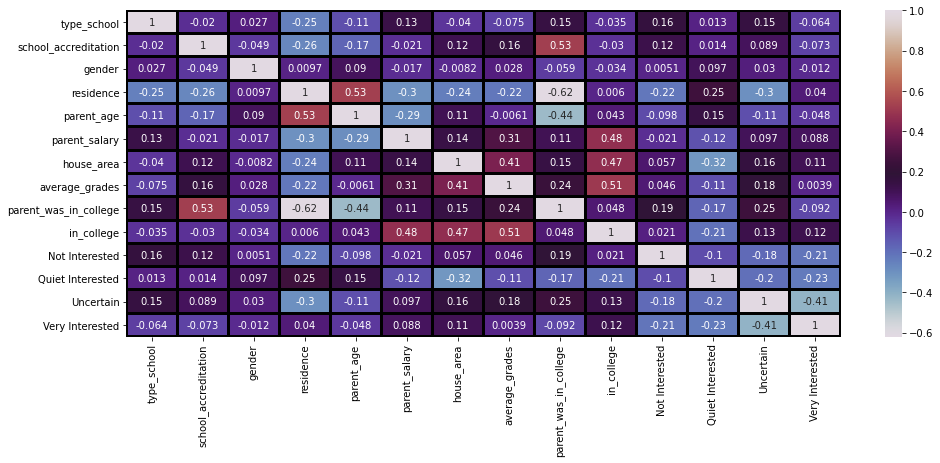

In [44]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="black", linewidths=2, cmap="twilight")

In [45]:
df.head(4)

,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,Not Interested,Quiet Interested,Uncertain,Very Interested
0,0,0,1,1,56,6950000,83.0,84.09,0,1,0,0,0,0
1,0,0,1,1,57,4410000,76.8,86.91,0,1,0,0,0,0
2,0,1,0,1,50,6500000,80.6,87.43,0,1,0,0,0,1
3,1,1,1,0,49,6600000,78.2,82.12,1,1,0,0,0,1


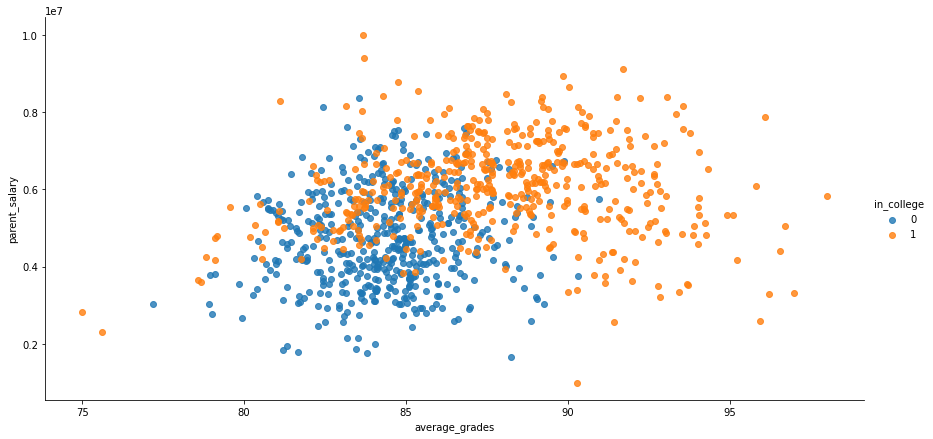

In [60]:
sns.lmplot(x = "average_grades", y ="parent_salary", data=df, height=6, aspect=2, fit_reg=False, hue = "in_college")

<AxesSubplot:xlabel='gender', ylabel='parent_salary'>

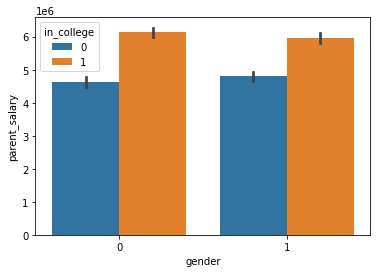

In [66]:
sns.barplot(x = "gender", y ="parent_salary", data = df, hue="in_college")

In [88]:
df.head(3)

,type_school,school_accreditation,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college,Not Interested,Quiet Interested,Uncertain,Very Interested
0,0,0,1,1,56,6950000,83.0,84.09,0,1,0,0,0,0
1,0,0,1,1,57,4410000,76.8,86.91,0,1,0,0,0,0
2,0,1,0,1,50,6500000,80.6,87.43,0,1,0,0,0,1


In [89]:
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'residence',
       'parent_age', 'parent_salary', 'house_area', 'average_grades',
       'parent_was_in_college', 'in_college', 'Not Interested',
       'Quiet Interested', 'Uncertain', 'Very Interested'],
      dtype='object')

In [92]:
scalar = StandardScaler()

In [93]:
scalar.fit(df[['parent_age', 'parent_salary', 'house_area', 'average_grades']])

StandardScaler()

In [95]:
scaledData = scalar.transform(df[['parent_age', 'parent_salary', 'house_area', 'average_grades']])

In [98]:
scaled_values = pd.DataFrame(scaledData, columns= ['parent_age', 'parent_salary', 'house_area', 'average_grades'])

In [99]:
df.drop(['parent_age', 'parent_salary', 'house_area', 'average_grades'], axis=1, inplace=True)

In [100]:
df = pd.concat([df, scaled_values], axis=1)

In [101]:
df

,type_school,school_accreditation,gender,residence,parent_was_in_college,in_college,Not Interested,Quiet Interested,Uncertain,Very Interested,parent_age,parent_salary,house_area,average_grades
0,0,0,1,1,0,1,0,0,0,0,1.083838,1.122836,0.555074,-0.594365
1,0,0,1,1,0,1,0,0,0,0,1.369661,-0.695545,0.149467,0.240684
2,0,1,0,1,0,1,0,0,0,1,-0.631096,0.800682,0.398065,0.394664
3,1,1,1,0,1,1,0,0,0,1,-0.916918,0.872272,0.241055,-1.177715
4,0,0,0,1,0,0,0,0,0,1,1.369661,-0.094191,0.038251,0.205150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,1,1,0,0,0,1,-0.916918,1.459308,-0.714086,-0.031744
996,0,1,0,0,1,1,0,0,0,0,-0.345273,1.502262,0.640121,1.072771
997,1,0,1,1,0,1,0,0,0,0,-0.916918,0.120579,0.044794,-1.935773
998,0,1,1,0,1,1,0,0,1,0,0.226371,0.328189,2.046665,0.320635


In [102]:
X = df.drop("in_college", axis=1)
y = df["in_college"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [104]:
log_model = LogisticRegression(max_iter=500)

In [105]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [106]:
predictions = log_model.predict(X_test)

In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       151
           1       0.86      0.83      0.84       149

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Lets see if we can improve with Knighbors

In [115]:
kNeig = KNeighborsClassifier(n_neighbors=3)

In [116]:
kNeig.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
knPredictions = kNeig.predict(X_test)

In [118]:
print(classification_report(knPredictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       164
           1       0.85      0.93      0.88       136

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Elbow method
- 3 looks to be the better choice for the number of neighbors to consider
- will go back and revert to 3 in our previous model

In [112]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

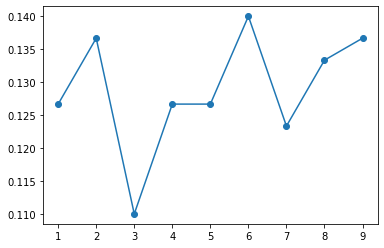

In [113]:
plt.plot(range(1,10), error_rate, marker = "o")

## SVM

In [119]:
svm = SVC()

In [120]:
svm.fit(X_train,y_train)

SVC()

In [121]:
svmPredict = svm.predict(X_test)

In [122]:
print(classification_report(svmPredict, y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       162
           1       0.86      0.93      0.89       138

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Improving with Graph Search

In [123]:
graphParams = {"C": [1,10,100,1000], "gamma":[0.1,0.001, 0.0001, 0.00001]}

In [124]:
graph = GridSearchCV(estimator=SVC(), param_grid=graphParams, verbose=3)

In [125]:
graph.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 2/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 3/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 4/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [126]:
graphPredictions = graph.predict(X_test)

In [127]:
print(classification_report(graphPredictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       163
           1       0.85      0.93      0.89       137

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



## Random Forest

In [128]:
rf = RandomForestClassifier(n_estimators=500)

In [130]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [131]:
rfPredictions = rf.predict(X_test)

In [132]:
print(classification_report(rfPredictions, y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       164
           1       0.85      0.93      0.88       136

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [154]:
clusterModel = KMeans(n_clusters=2)

In [155]:
clusterModel.fit(df.drop("in_college", axis=1))

KMeans(n_clusters=2)

In [156]:
##clusterModel.transform(df.drop("in_college", axis=1))

In [157]:
clusterModel.labels_

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [158]:
errorRate = []
for i in range(1,8):
    kmm = KMeans(n_clusters=i)
    kmm.fit(df.drop("in_college", axis=1))
    errorRate.append(np.mean(kmm.labels_ != df["in_college"]))

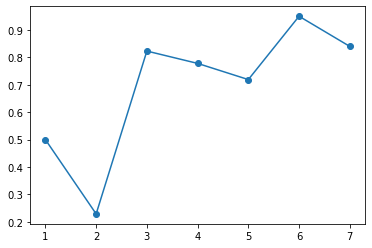

In [159]:
plt.plot(range(1,8), errorRate, marker = "o")

## PCA

In [234]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA(n_components=6)

In [236]:
transformedData = pca.fit_transform(df.drop("in_college", axis=1))

In [237]:
pcaDF = pd.DataFrame(transformedData)

In [238]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.028241,-0.088228,0.011083,0.215360,-0.168398,-0.018956,0.067467,-0.091271,-0.025838,0.299318,-0.521808,-0.462212,-0.571957
1,0.087091,0.028981,-0.037864,-0.155818,0.126110,0.013784,0.006991,0.005122,-0.004761,-0.723655,0.264818,-0.504761,-0.317933
2,-0.012302,0.226294,-0.044266,-0.206719,0.280723,0.056813,-0.064269,0.083114,-0.040046,-0.388813,-0.718449,0.371165,-0.064530
3,-0.083916,0.130493,0.040268,0.040407,0.115708,0.012048,0.092318,0.043794,-0.141137,-0.001250,-0.286380,-0.585689,0.709744
4,-0.428043,-0.243438,-0.122049,0.248629,-0.292050,-0.077549,-0.050052,-0.415230,0.505508,-0.332224,-0.128131,0.062961,0.168173
5,-0.208428,0.560966,-0.655818,0.027054,0.265884,0.019058,0.005445,-0.213484,0.120344,0.212366,0.145398,-0.067084,-0.095705


In [239]:
pcaDF["target"] = df["in_college"]

In [240]:
X = transformedData
y = pcaDF["target"]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [242]:
log_mo = LogisticRegression(n_jobs=400)

In [243]:
log_mo.fit(X_train,y_train)

LogisticRegression(n_jobs=400)

In [244]:
log_pred = log_mo.predict(X_test)

In [245]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       149
           1       0.82      0.81      0.81       151

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [252]:
K_near = KNeighborsClassifier(n_neighbors=5)

In [253]:
K_near.fit(X_train,y_train)

KNeighborsClassifier()

In [254]:
k_nearPred = K_near.predict(X_test)

In [255]:
print(classification_report(k_nearPred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       159
           1       0.83      0.87      0.85       141

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [256]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

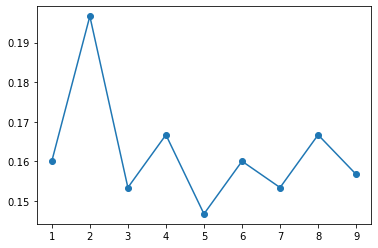

In [257]:
plt.plot(range(1,10), error_rate, marker = "o")

In [258]:
rand_Forest = RandomForestClassifier(n_estimators=400)

In [259]:
rand_Forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [260]:
rand_pred = rand_Forest.predict(X_test)

In [261]:
print(classification_report(rand_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       158
           1       0.81      0.85      0.83       142

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [262]:
svm_model = SVC()

In [263]:
svm_model.fit(X_train, y_train)

SVC()

In [264]:
svm_pred = svm_model.predict(X_test)

In [265]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       171
           1       0.79      0.91      0.84       129

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

